## CUSTOMER SEGMENTATION - CLUSTERING

<img src='https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true'>
<a href='https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset!' target=_blank>Data dosyasını buradan bulabilirsiniz </a>

* Bu projede, bir alışveriş firmasının veri tabanındaki müşteri kayıtlarındaki verilerin kümelenmesini gerçekleştireceğiz yani müşterileri her kümedeki müşteriler arasındaki benzerlikleri yansıtacak şekilde gruplara ayıracağız. Her müşterinin işletme açısından önemini optimize etmek için müşterileri segmentlere ayıracağız. Bu proje işletmenin farklı müşteri türlerinin ihtiyaçlarını karşılamasına da yardımcı olur.

# RFM NEDİR? 
RFM (Recency, Frequency, Monetary) müşteri segmentasyonu yöntemi, müşterilerin son satın alma tarihi, satın alma sıklığı ve satın alma tutarlarına göre sınıflandırılmasıdır. Bu yöntem sayesinde işletmeler müşteri ilişkileri yönetimi ve pazarlama stratejilerini daha etkin biçimde oluşturabilirler.

RFM yönteminin üç temel bileşeni şunlardır:

Recency (R - Güncellik): Müşterinin son satın alma tarihi. Daha güncel satın alan müşteriler daha yüksek değer alır.

Frequency (F - Sıklık): Müşterinin belirli bir zaman dilimindeki satın alma sıklığı. Daha sık satın alan müşteriler daha yüksek değer alır.

Monetary (M - Parasal Değer): Müşterinin toplam satın alma tutarı. Daha yüksek harcama yapan müşteriler daha yüksek değer alır.

İşletmeler, müşterilerini bu üç ölçüte göre analiz ederek onlara farklı pazarlama ve müşteri ilişkileri yönetimi yaklaşımları uygulayabilirler. Örneğin en yüksek RFM skoruna sahip müşterilere özel kampanyalar, ek hizmetler veya sadakat programları sunulabilir. Bu sayede müşteri sadakati ve karlılık artırılabilir.

RFM yöntemi, müşteri davranışlarının anlaşılması ve işletmelerin daha etkili pazarlama stratejileri geliştirebilmesi için yaygın olarak kullanılan bir yöntemdir.

* Data dictionary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',100)
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

In [3]:
data.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


* Verileri üç ayrı dataframe'de (Müşteriler, Ürünler, Siparişler) tutacağız. Bu üç dataframe'i daha sonra tek bir dataframe'de birleştireceğiz.

In [5]:
# Müşteriler dataframe'ini oluşturma
customers_df = data[['Customers.id', 'Customers.fname', 'Customers.lname', 'Customers.company', 'Customers.create_date', 'Customers.status', 'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt', 'Customers.account_id', 'Customers.sales_rep', 'Customers.rewards', 'Customers.profile_id', 'Customers.last_modified', 'Customers.customer_type']]

# Ürünler dataframe'ini oluşturma
products_df = data[['Products.seo_description', 'Products.seo_keywords', 'Products.seo_header', 'Products.seo_footer', 'Products.seo_url', 'Products.seo_category', 'Products.unit', 'Products.packaging', 'Products.display_packaging', 'Products.multiple', 'Products.length', 'Products.width', 'Products.height', 'Products.rx', 'Products.latex', 'Products.upc', 'Products.msds_link', 'Products.msds_label', 'Products.lit_link', 'Products.lit_label', 'Products.hcpcs', 'Products.case_qty', 'Products.markup', 'Products.override_markup', 'Products.notes', 'Products.import_flags', 'Products.map_price', 'Products.features_title', 'Products.warranty', 'Products.hygienic', 'Products.default_quantity', 'Products.user_size', 'Products.assembly', 'Products.installation', 'Products.shipping_length', 'Products.shipping_width', 'Products.shipping_height', 'Products.shipping_weight', 'Products.handling_time', 'Products.rotation_link', 'Products.google_shopping_label', 'Products.product_option', 'Products.size', 'Products.material', 'Products.arm_style', 'Products.leg_style', 'Products.seat_size', 'Products.family_id', 'Products.saved_status', 'Products.freight_cost']]

# Siparişler dataframe'ini oluşturma
orders_df = data[['Orders.id', 'Orders.customer_id', 'Orders.fname', 'Orders.lname', 'Orders.company', 'Orders.order_number', 'Orders.reorder_id', 'Orders.external_source', 'Orders.external_id', 'Orders.currency', 'Orders.sales_rep', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping', 'Orders.coupon_id', 'Orders.coupon_amount', 'Orders.gift_id', 'Orders.gift_amount', 'Orders.fee_name', 'Orders.fee_amount', 'Orders.discount_name', 'Orders.discount_amount', 'Orders.total', 'Orders.balance_due', 'Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.shipping_trans', 'Orders.shipping_flags', 'Orders.weight', 'Orders.tracking', 'Orders.payment_status', 'Orders.payment_date', 'Orders.payment_user', 'Orders.payment_type', 'Orders.payment_method']]

* bu üç dataframe'i SQLite veritabanına kaydedelim

 ###### Neden SLQLite kaydettik
* Veri Organizasyonu: Müşteriler, Ürünler ve Siparişler verilerini ayrı tablolarda tutmak, verilerin daha iyi organize edilmesini sağlar. Bu, verilerin yönetimini ve analizini kolaylaştırır.
* İlişkisel Veri Yapısı: Müşteriler, ürünler ve siparişler arasındaki ilişkiler, ilişkisel bir veri yapısında daha iyi yönetilebilir. SQLite, ilişkisel veritabanı özelliklerini sağlayarak, bu tür ilişkileri modellemek için uygun bir seçenektir.
* Verimlilik ve Ölçeklenebilirlik: Büyük veri setlerinde, tüm verileri tek bir DataFrame'de tutmak performans sorunlarına yol açabilir. SQLite, verileri daha küçük parçalara bölerek, ölçeklenebilirlik ve verimlilik sağlar.


Şu an için müşteri, ürün ve sipariş bilgilerini tek bir DataFrame'de kullanıyorsunuz.
Ancak ilerleyen zamanlarda, müşteri verilerini ayrı bir analizde kullanmak istiyorsunuz.
Verileri SQLite veritabanında ayrı tablolar halinde tutarsanız, müşteri verilerini kolayca çekebilir ve bu analizi gerçekleştirebilirsiniz.
Daha sonra, ürün bilgilerini de ayrı bir analizde kullanmak istediğinizde, ürün tablosundan verileri kolayca çekebilirsiniz.
Yani verileri ayrı tablolar halinde SQLite'da tutmak, ilerideki farklı analiz ihtiyaçlarınız için verileri yeniden kullanmanızı kolaylaşt senaryo:

Müşteri bilgileri bir CRM sisteminden, ürün bilgileri bir ERP sisteminden, sipariş bilgileri ise bir e-ticaret platformundan geliyor.
Bu farklı kaynaklardan gelen verileri tek bir DataFrame'de birleştirmek zor olabilir.
Ancak, önce bu verileri SQLite veritabanında ayrı tablolar halinde depolarsanız, daha sonra bu tabloları JOIN ederek entegre bir veri seti oluşturabilirsiniz.
Bu sayede, farklı kaynaklardan gelen verileri daha kolay bir şekilde birleştirebilir ve entegre edebilirsiniz.
Yani SQLite veritabanını kullanarak, farklı sistemlerden gelen verileri daha kolay bir şekilde bir araya getirebilirsiniz.

In [6]:
import sqlite3

# SQLite veritabanını oluşturma
conn = sqlite3.connect('pbl5_data.db')

# Dataframe'leri veritabanına aktarma
customers_df.to_sql('Customers', conn, if_exists='replace', index=False)
products_df.to_sql('Products', conn, if_exists='replace', index=False)
orders_df.to_sql('Orders', conn, if_exists='replace', index=False)

# Veritabanı bağlantısını kapatma
conn.close()

* Veritabanındaki tabloları birleştirerek tek bir dataframe oluşturabiliriz:

In [7]:
# SQLite veritabanından tabloları okuma
conn = sqlite3.connect('pbl5_data.db')

customers_df = pd.read_sql_query("SELECT * FROM Customers", conn)
products_df = pd.read_sql_query("SELECT * FROM Products", conn)
orders_df = pd.read_sql_query("SELECT * FROM Orders", conn)

In [8]:
customers_df.isnull().sum()

Customers.id                  0
Customers.fname               0
Customers.lname               0
Customers.company          3467
Customers.create_date         0
Customers.status           4093
Customers.mailing          2080
Customers.reminders        4194
Customers.tax_exempt       4189
Customers.account_id       4191
Customers.sales_rep        4194
Customers.rewards          4194
Customers.profile_id       4194
Customers.last_modified       0
Customers.customer_type     423
dtype: int64

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customers.id             4194 non-null   int64  
 1   Customers.fname          4194 non-null   object 
 2   Customers.lname          4194 non-null   object 
 3   Customers.company        727 non-null    object 
 4   Customers.create_date    4194 non-null   int64  
 5   Customers.status         101 non-null    float64
 6   Customers.mailing        2114 non-null   float64
 7   Customers.reminders      0 non-null      object 
 8   Customers.tax_exempt     5 non-null      float64
 9   Customers.account_id     3 non-null      float64
 10  Customers.sales_rep      0 non-null      object 
 11  Customers.rewards        0 non-null      object 
 12  Customers.profile_id     0 non-null      object 
 13  Customers.last_modified  4194 non-null   int64  
 14  Customers.customer_type 

In [10]:
# last_modified sütunundaki Unix timestamp değerlerini datetime'a çevirin
customers_df['Customers.last_modified'] = pd.to_datetime(customers_df['Customers.last_modified'], unit='s')

# Sadece tarih kısmını alın (saat bilgisini çıkarın)
customers_df['Customers.last_modified'] = customers_df['Customers.last_modified'].dt.date

# Artık last_modified_only sütunu sadece tarih bilgisini içeriyor
print(customers_df['Customers.last_modified'])

0       2015-07-24
1       2015-07-24
2       2015-07-24
3       2015-07-24
4       2015-07-24
           ...    
4189    2016-05-16
4190    2016-05-16
4191    2016-05-16
4192    2016-05-16
4193    2016-05-16
Name: Customers.last_modified, Length: 4194, dtype: object


In [11]:
# Customers.last_modified sütununu datetime'a çevirme
customers_df['Customers.last_modified'] = pd.to_datetime(customers_df['Customers.last_modified'])

In [12]:
#sns.countplot(customers_df['Customers.status']);
customers_df['Customers.status'].value_counts(normalize=True)

Customers.status
0.0    1.0
Name: proportion, dtype: float64

In [13]:
customers_df['company'] = customers_df['Customers.company'].str.replace('Company', '').astype(float)

In [14]:
customers_df['company']=customers_df['company'].fillna(customers_df['company'].mean())

In [15]:
customers_df['company'].value_counts(normalize=True)

company
190.576341    0.826657
145.000000    0.006438
130.000000    0.004053
59.000000     0.003577
52.000000     0.003100
                ...   
163.000000    0.000238
162.000000    0.000238
160.000000    0.000238
157.000000    0.000238
425.000000    0.000238
Name: proportion, Length: 426, dtype: float64

In [16]:
del customers_df['Customers.company']

In [17]:
# customers_df'deki object türündeki sütunları seçme
obj_cols = customers_df.select_dtypes(include=['object']).columns

# seçilen sütunları orders_df'den silme
customers_df = customers_df.drop(obj_cols, axis=1)

In [18]:
# Boş değerleri ortalama ile doldurma
customers_df = customers_df.fillna(customers_df.mean())

In [19]:
customers_df.sample(5)

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,company
1595,1350,1438010727,0.0,1.000000,0.2,7.333333,2015-07-28,0.000000,190.576341
3762,3323,1461335082,0.0,0.979659,0.2,7.333333,2016-04-22,0.137364,190.576341
141,143,1400082233,0.0,1.000000,0.2,7.000000,2015-07-24,0.000000,17.000000
2750,2335,1453927575,0.0,0.979659,0.2,7.333333,2016-03-02,0.137364,190.576341
3823,3381,1461702534,0.0,1.000000,0.2,7.333333,2016-04-26,0.000000,376.000000


In [20]:
products_df.sample(5)

,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
3576,None,None,None,None,Sterile-Bordered-Gauze-5,0.0,BX,15 Each / Box,None,1 BX,NaN,NaN,NaN,None,None,NaN,None,None,None,None,A6219,15.0,None,0.0,None,0.0,NaN,None,None,0.0,None,None,None,None,5.30,6.4,1.8,NaN,None,None,0.0,None,"4"" x 4""",None,None,None,None,PF00120,3.0,None
1101,Lightweight and durable transport wheelchair w...,"transport wheelchair, transport wheelchairs, l...",None,None,Medline-Deluxe-Aluminum-Transport-Chair-With-H...,0.0,CS,1 Each / Case,None,1 CS,NaN,NaN,NaN,None,None,NaN,None,None,None,None,E1038,1.0,None,1.0,None,136.0,NaN,None,None,0.0,None,None,None,None,28.00,11.0,30.5,NaN,None,None,5.0,None,None,None,None,None,None,PF21897,3.0,None
2230,None,rollator; rollator walker; rollators; 4 wheel ...,None,None,Walker-Rollator-with-Fold-Up-Removable-Back-Su...,0.0,CV,None,None,None,27.5,24.5,32.0,No,Not Made With Natura,8.223830e+11,None,None,http://www.drivemedical.com/product-manuals/r7...,None,E0143;E0156,NaN,None,0.0,None,0.0,NaN,None,Limited Lifetime,0.0,None,Universal,Basic Assembly Required,No Installation Required,31.00,24.2,7.6,15.8,Ships Same Day,https://www.drivemedical.com/rollators/r726rd/...,NaN,None,None,None,None,None,None,RS4,0.0,None
1148,None,None,None,None,Freedom-Transport-ChairsBlue-2,0.0,EA,1 Each / Each,None,1 EA,NaN,NaN,NaN,None,None,8.019630e+10,None,None,None,50012347-8701-2f10-7495-92700cfdbaf0,E1038,1.0,None,0.0,None,136.0,155.0,None,None,NaN,None,None,None,None,26.25,12.2,32.5,NaN,None,None,NaN,None,None,None,None,None,None,PF21895,0.0,None
1286,None,None,None,None,FitRight-Active-Male-Guards,0.0,CS,208 Each / Case,None,1 CS,NaN,NaN,NaN,None,Yes,NaN,None,None,None,f06f7cfc-6e9c-2f10-3ea3-80c79adc33b6,NOT COVERED BY MEDICARE - CHECK REIMBURSEMENT ...,208.0,None,0.0,None,NaN,65.0,None,None,NaN,None,None,None,None,18.00,10.0,17.0,NaN,None,None,NaN,None,None,None,None,None,None,PF19559,0.0,None


In [21]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Products.seo_description        565 non-null    object 
 1   Products.seo_keywords           1158 non-null   object 
 2   Products.seo_header             9 non-null      object 
 3   Products.seo_footer             0 non-null      object 
 4   Products.seo_url                4037 non-null   object 
 5   Products.seo_category           2837 non-null   float64
 6   Products.unit                   3985 non-null   object 
 7   Products.packaging              2890 non-null   object 
 8   Products.display_packaging      16 non-null     object 
 9   Products.multiple               2964 non-null   object 
 10  Products.length                 998 non-null    float64
 11  Products.width                  996 non-null    float64
 12  Products.height                 99

In [22]:
# products_df'deki object türündeki sütunları seçme
obj_cols = products_df.select_dtypes(include=['object']).columns

# seçilen sütunları orders_df'den silme
products_df = products_df.drop(obj_cols, axis=1)

In [23]:
# Boş değerleri ortalama ile doldurma
products_df = products_df.fillna(products_df.mean())

In [24]:
orders_df.isnull().sum()

Orders.id                     0
Orders.customer_id            0
Orders.fname                  0
Orders.lname                  0
Orders.company             3466
Orders.order_number           0
Orders.reorder_id          4112
Orders.external_source     3829
Orders.external_id         4189
Orders.currency               0
Orders.sales_rep           4194
Orders.subtotal               0
Orders.tax                  457
Orders.shipping             195
Orders.coupon_id           3312
Orders.coupon_amount       3312
Orders.gift_id             4194
Orders.gift_amount         4194
Orders.fee_name            3967
Orders.fee_amount          3916
Orders.discount_name       3912
Orders.discount_amount     3830
Orders.total                  0
Orders.balance_due         3843
Orders.shipping_carrier     617
Orders.shipping_method      443
Orders.shipping_trans      4194
Orders.shipping_flags      4194
Orders.weight              4191
Orders.tracking             376
Orders.payment_status         5
Orders.p

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Orders.id                4194 non-null   int64  
 1   Orders.customer_id       4194 non-null   int64  
 2   Orders.fname             4194 non-null   object 
 3   Orders.lname             4194 non-null   object 
 4   Orders.company           728 non-null    object 
 5   Orders.order_number      4194 non-null   object 
 6   Orders.reorder_id        82 non-null     float64
 7   Orders.external_source   365 non-null    object 
 8   Orders.external_id       5 non-null      float64
 9   Orders.currency          4194 non-null   object 
 10  Orders.sales_rep         0 non-null      object 
 11  Orders.subtotal          4194 non-null   float64
 12  Orders.tax               3737 non-null   float64
 13  Orders.shipping          3999 non-null   float64
 14  Orders.coupon_id        

* orders tablosundaki "payment_date" sütunundaki "1.431705e+09" değeri biraz karışık görünüyor. Bu, bilimsel gösterim olarak adlandırılan bir sayı gösterimidir.

Daha açık bir şekilde açıklayalım:

"1.431705e+09" değeri, aslında 1,431,705,000,000 anlamına gelmektedir. Bilimsel gösterimde "e+" ifadesi, ondalık sayının 10 tabanında yükseltilmesi gerektiğini belirtir.

Peki bu değerin ne olduğu sorusuna gelince, büyük ihtimalle bu, Unix timestamp formatında depolanmış bir tarih değeridir. Unix timestamp, 1970 yılının 1 Ocak'ından itibaren geçen saniye sayısını ifade eder.

Dolayısıyla, "1.431705e+09" değeri, 1970-01-01'den yaklaşık 1,431,705,000 saniye (yani 45 yıl) sonraki bir tarihi temsil etmektedir. Bu tarihi daha anlaşılır bir şekilde göstermek için, bu Unix timestamp değerini Python'daki datetime modülü kullanarak çevirmemiz gerekir

In [26]:
import datetime
# orders_date sütunundaki Unix timestamp değerlerini datetime'a çevirin
orders_df['Orders.payment_date'] = pd.to_datetime(orders_df['Orders.payment_date'], unit='s')

# Sadece tarih kısmını alın (saat bilgisini çıkarın)
orders_df['Orders.payment_date'] = orders_df['Orders.payment_date'].dt.date

# Artık orders_date_only sütunu sadece tarih bilgisini içeriyor
print(orders_df['Orders.payment_date'])

0       2015-03-10
1       2013-12-03
2       2015-12-08
3       2013-12-11
4       2013-12-12
           ...    
4189    2016-05-16
4190    2016-05-16
4191    2016-05-16
4192    2016-05-16
4193    2016-05-16
Name: Orders.payment_date, Length: 4194, dtype: object


In [27]:
# Orders.payment_date sütununu datetime'a çevirme
orders_df['Orders.payment_date'] = pd.to_datetime(orders_df['Orders.payment_date'])

In [28]:
# orders_df'deki object türündeki sütunları seçme
obj_cols = orders_df.select_dtypes(include=['object']).columns

# seçilen sütunları orders_df'den silme
orders_df = orders_df.drop(obj_cols, axis=1)

In [29]:
# Boş değerleri ortalama ile doldurma
orders_df = orders_df.fillna(orders_df.mean())

In [30]:
orders_df.sample(5)

,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.weight,Orders.payment_status,Orders.payment_date
3999,16664,3540,7389.158537,6.018061e+08,33.95,0.000000,9.95,20.403628,9.972676,14.75259,9.950000,33.95,47.981396,18.0,3.0,2016-05-05
395,1799,356,7389.158537,6.018061e+08,25.52,0.000000,0.00,20.403628,9.972676,14.75259,0.620000,24.90,47.981396,18.0,3.0,2014-09-28
1146,6116,966,7389.158537,6.018061e+08,52.11,0.000000,9.95,20.403628,9.972676,14.75259,13.086676,62.06,47.981396,18.0,3.0,2015-09-07
1141,4119,962,7389.158537,6.018061e+08,164.56,0.800838,9.95,13.000000,8.230000,14.75259,13.086676,166.28,47.981396,18.0,3.0,2015-05-02
1156,6235,973,7389.158537,6.018061e+08,184.00,0.000000,0.00,4.000000,0.000000,14.75259,13.086676,184.00,47.981396,18.0,3.0,2015-09-10


* Tabloları birleştirme

In [31]:
df= pd.concat([customers_df, products_df, orders_df], ignore_index=True)

In [32]:
import pickle

# Birleştirilmiş DataFrame'i kaydet 
with open('combined_df.pickle', 'wb') as f:
    pickle.dump(df, f)

#bu kodla yükle
#with open('combined_df.pickle', 'rb') as f:
    #df = pickle.load(f)

In [33]:
df.head()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.tax_exempt,Customers.account_id,Customers.last_modified,Customers.customer_type,company,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.saved_status,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.weight,Orders.payment_status,Orders.payment_date
0,797.0,1.426019e+09,0.0,0.979659,0.2,7.333333,2015-07-24,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,3.0,1.386089e+09,0.0,0.979659,0.2,7.333333,2015-07-24,0.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3.0,1.386089e+09,0.0,0.979659,0.2,7.333333,2015-07-24,0.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,4.0,1.386780e+09,0.0,0.979659,0.2,7.333333,2015-07-24,0.0,190.576341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,5.0,1.386862e+09,0.0,0.000000,0.2,7.333333,2015-07-24,0.0,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [34]:
df.shape

(12582, 41)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12582 entries, 0 to 12581
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Customers.id                    4194 non-null   float64       
 1   Customers.create_date           4194 non-null   float64       
 2   Customers.status                4194 non-null   float64       
 3   Customers.mailing               4194 non-null   float64       
 4   Customers.tax_exempt            4194 non-null   float64       
 5   Customers.account_id            4194 non-null   float64       
 6   Customers.last_modified         4194 non-null   datetime64[ns]
 7   Customers.customer_type         4194 non-null   float64       
 8   company                         4194 non-null   float64       
 9   Products.seo_category           4194 non-null   float64       
 10  Products.length                 4194 non-null   float64       
 11  Pr

In [36]:
dfa=df.groupby('Customers.id').agg({'Orders.total': lambda x: x.sum(),
                                     'Customers.last_modified': lambda x: x.max()})
#dfa içinde ayrı bi df oluşturup her müşterinin id'si toplam sipariş tutarı ve son  değişikliğini alıyor.

In [37]:
dfb = df.groupby(['Customers.id','Orders.payment_date']).agg({'Orders.total': lambda x: x.sum()})
#dfb içinde ayrı bir df oluşturup her üşterinin ödeme yaptığı tarihleri ve turarını kaydediyor böylece ne sıklıkla alışveriş yaptığını bulabiliriz

In [38]:
dfc= df.groupby('Customers.id').agg({'Orders.total': lambda x: len(x)})
#dfc nin çinde ayrı bi df oluşturup müşterilerin ne kada harcadığını kaydediyor 

In [39]:
rfm_table = pd.merge(dfa, dfc ,on='Customers.id')
#dfc DataFrame'indeki diğer müşteri özelliklerini dfa DataFrame'ine ekler. 
#Bu sayede, müşteri başına hem toplam sipariş tutarı, en son değiştirilme tarihi gibi bilgiler hem de RFM özellikleri tek bir DataFrame'de toplanmış olur
#on='Customers.id' parametresi, iki DataFrame'i "Customers.id" sütunu üzerinden eşleştireceğini belirtir.
#Sonuç olarak bu rfm_table, müşterilerin hem özet finansal bilgilerini hem de RFM özelliklerini bir arada içerir.

In [40]:
rfm_table.head()

,Orders.total_x,Customers.last_modified,Orders.total_y
Customers.id,,,
3.0,0.0,2015-07-24,2
4.0,0.0,2015-07-24,1
5.0,0.0,2015-07-24,3
7.0,0.0,2015-07-24,1
8.0,0.0,2015-07-24,1


In [41]:
rfm_table = rfm_table.rename(columns={'Customers.last_modified': 'Recency', 
                                    'Orders.total_y': 'Frequency',
                                    'Orders.total_x': 'Money'})
#rfm_table DataFrame'indeki sütun isimlerini RFM (Recency, Frequency, Monetary Value) analizi için daha anlaşılır hale getirir

In [42]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3054 entries, 3.0 to 3736.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Money      3054 non-null   float64       
 1   Recency    3054 non-null   datetime64[ns]
 2   Frequency  3054 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 95.4 KB


In [43]:
x = rfm_table[['Money','Frequency']]

In [44]:
import numpy as np

* K-Means algoritmasıyla silhouette score hesaplıyoruz, her küme sayısını ve skoru allcluster ve allscore listelerine ekliyoruz, clust(10) yaptık 10 tanefarklı küme sayıları deneyecek.

In [45]:
allscore = []
allclusters = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster += 1 
        model = KMeans(n_clusters = no_of_cluster)
        model = model.fit(x)
        pred = model.predict(x)
        score = silhouette_score(x, pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.971818874969664
Number of cluster 3, silhouette 0.9135088546008944
Number of cluster 4, silhouette 0.9465294404523007
Number of cluster 5, silhouette 0.9541134488745732
Number of cluster 6, silhouette 0.9542516565832904
Number of cluster 7, silhouette 0.944873739729404
Number of cluster 8, silhouette 0.9821332175114367
Number of cluster 9, silhouette 0.985528770103637
Number of cluster 10, silhouette 0.9895435143750793


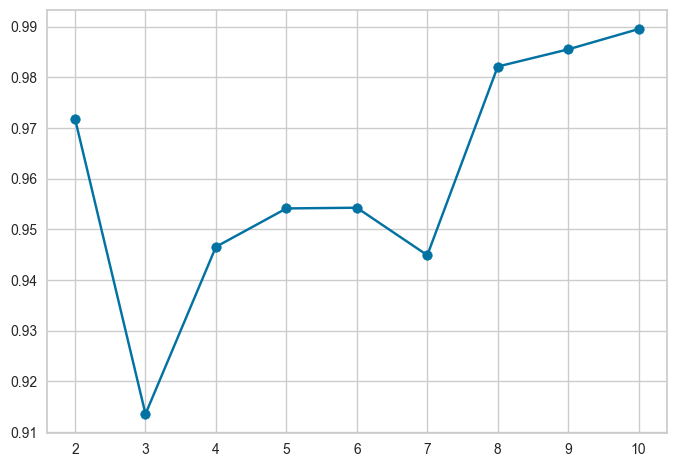

In [46]:
plt.plot(allclusters, allscore)
plt.scatter(allclusters, allscore)
#küme ssayısı ve silhouette score görüyoruz

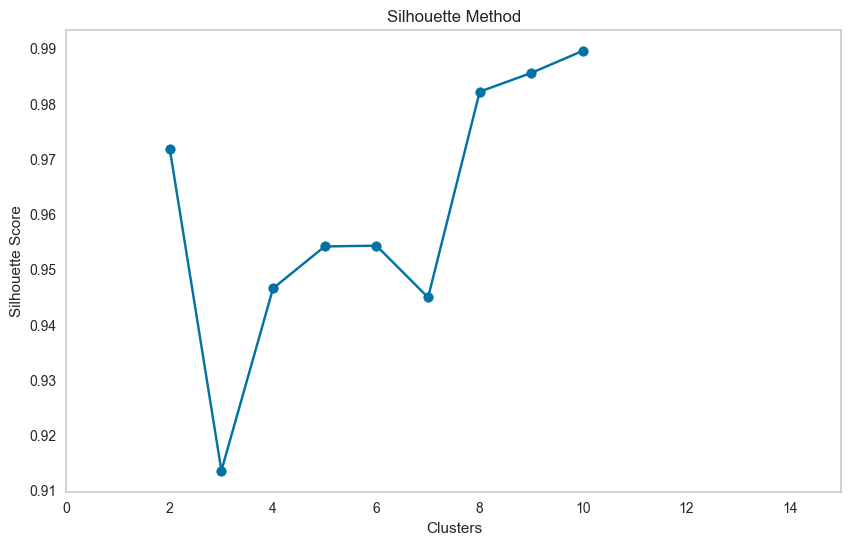

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(allclusters, allscore)
plt.scatter(allclusters, allscore)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xlim(0, 15)
plt.grid()
plt.show()
#farklı küme sayıları için de silhouette score bakabiliriz

In [48]:
model=KMeans(4)

In [49]:
model=model.fit(x)

In [50]:
tahmin=model.predict(x)

In [51]:
x['Cluster']=tahmin

In [52]:
x.head()

,Money,Frequency,Cluster
Customers.id,,,
3.0,0.0,2,0
4.0,0.0,1,0
5.0,0.0,3,2
7.0,0.0,1,0
8.0,0.0,1,0


In [53]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


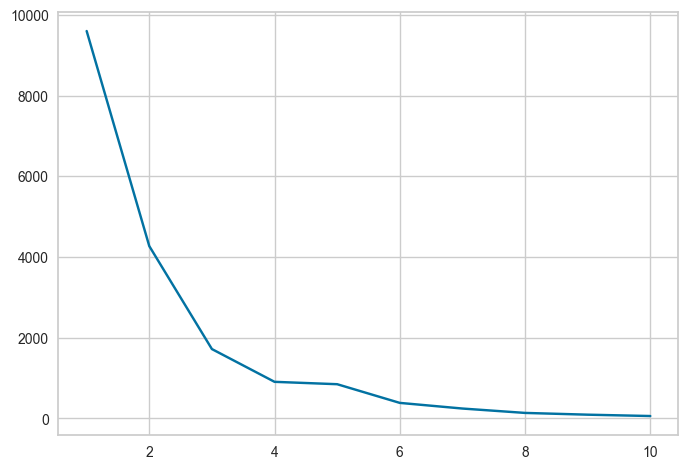

In [54]:
plt.plot(range(1,11),wcss)

In [55]:
#pip install yellowbrick

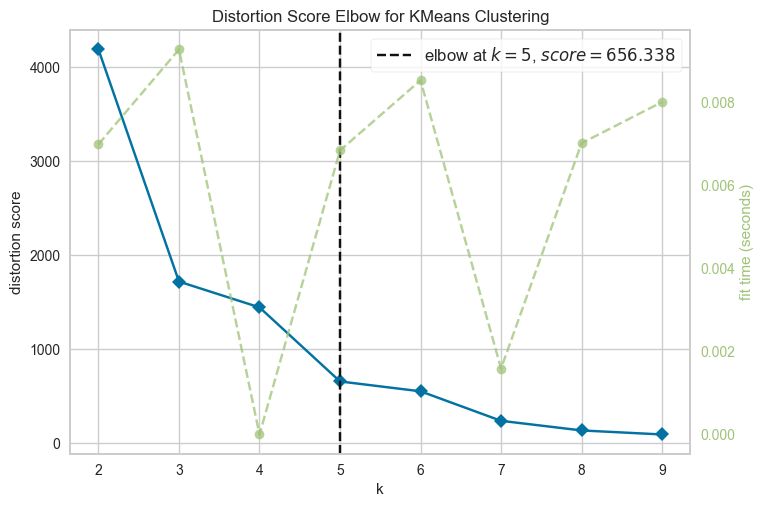

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
km=KMeans()
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()

* sonuç olarak, bu ploje bize veri setiyle en uygun çalışacak küme sayısını 5 olduğunu gösterdi

* Bu proje kodlarında Atakan Özdin ve Aman Kharwal'ın çalışmalarından destek alınmıştır